# ________________HEART DISEASE PREDICTION__________

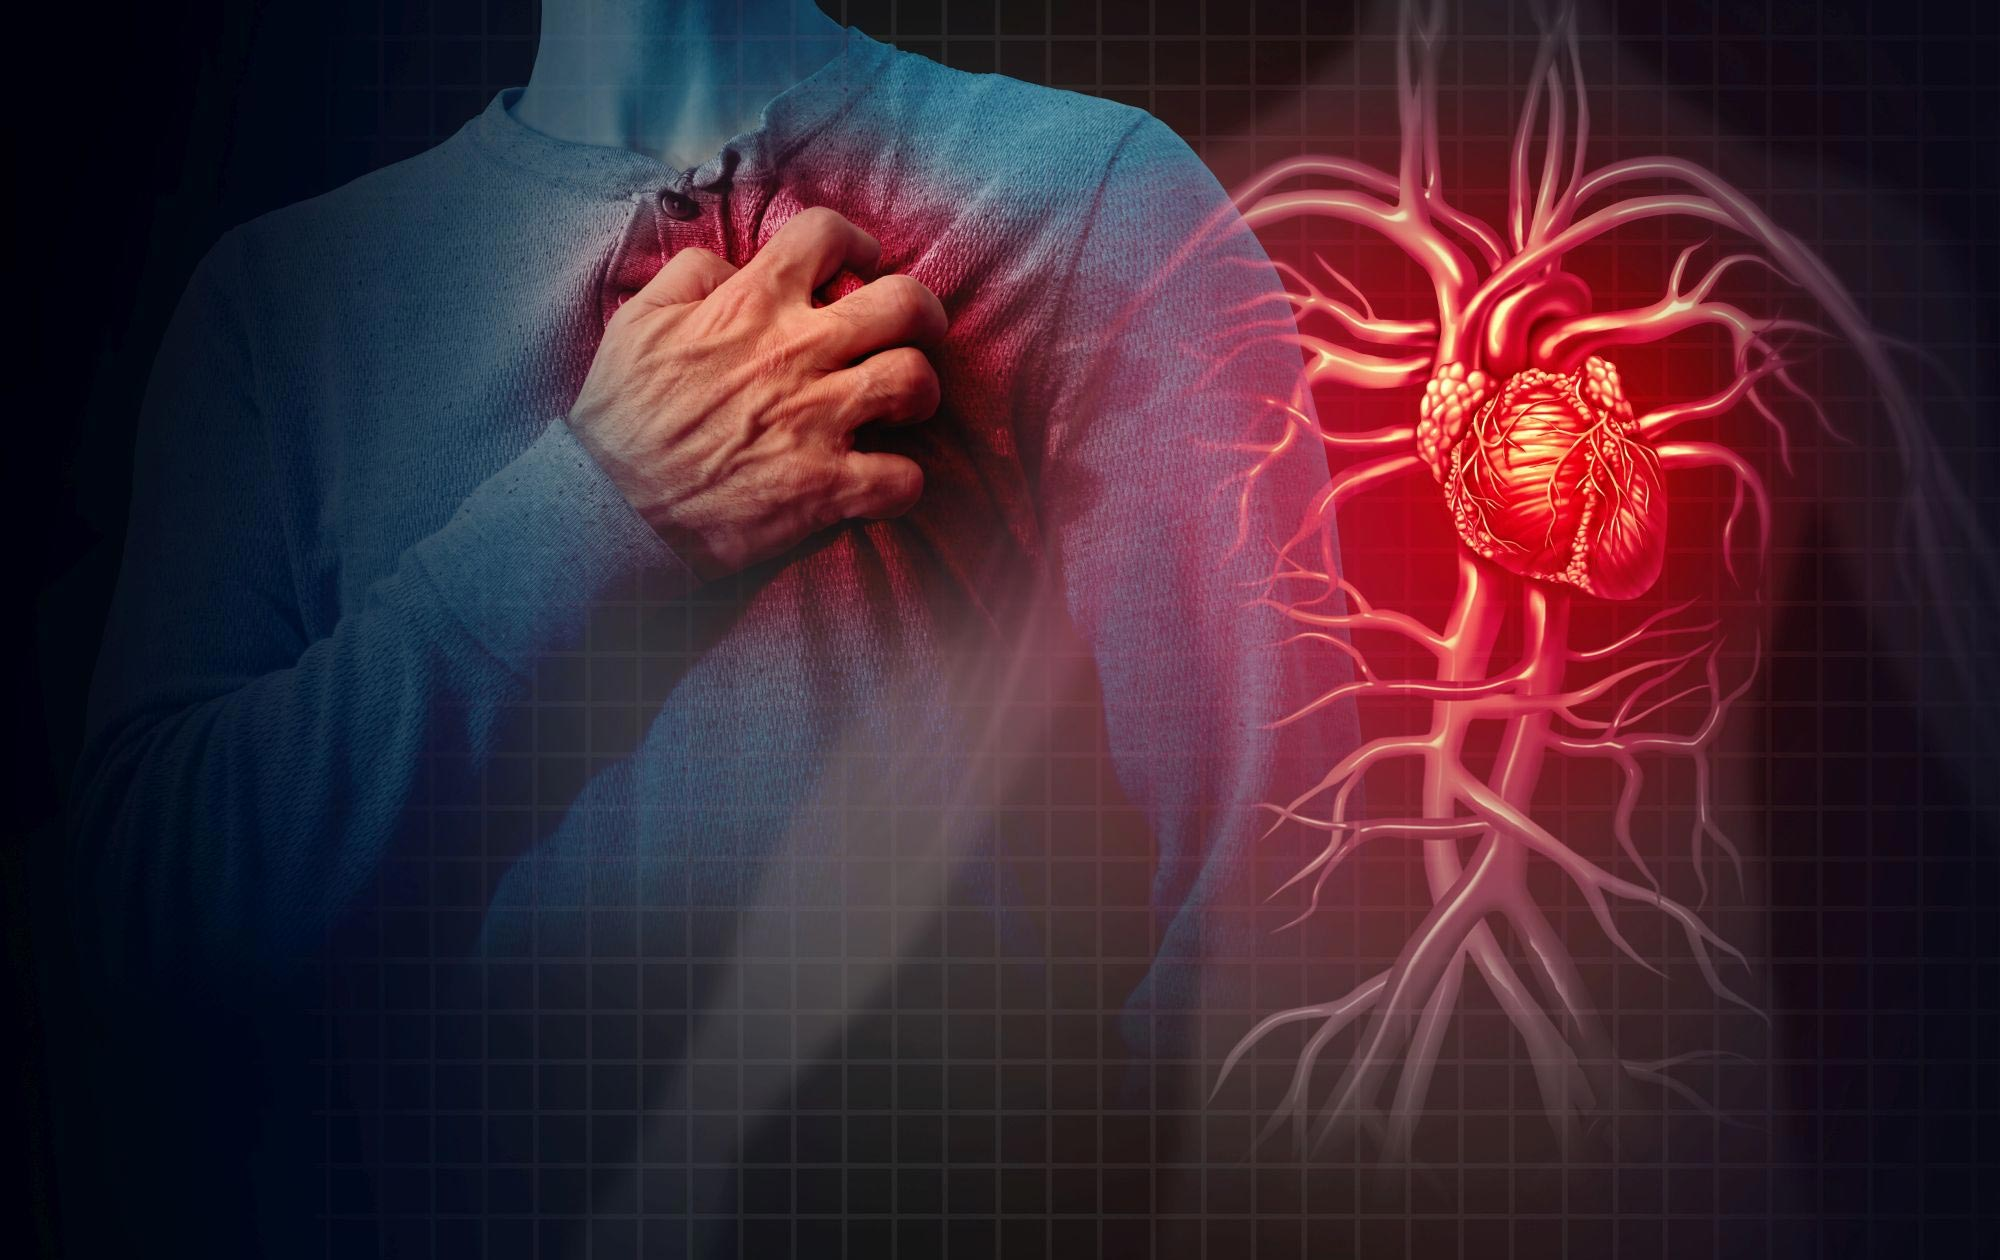


## Features Description

age = age in years

sex = (1 = male; 0 = female)

cp= chest pain type

trestbps= resting blood pressure (in mm Hg on admission to the hospital)

chol = serum cholestoral in mg/dl

fbs = ( fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

restecg = resting electrocardiographic results

thalach = maximum heart rate achieved

exang = exercise induced angina (1 = yes; 0 = no)

oldpeak = ST depression induced by exercise relative to rest

slope = the slope of the peak exercise ST segment

ca = number of major vessels (0-3) colored by flourosopy

thal3 = normal; 6 = fixed defect; 7 = reversable defect

target = 1 or 0

import pandas as pd
import numpy as np

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

from sklearn.ensemble import RandomForestClassifier


In [24]:
df=pd.read_csv('heart_disease_data.csv')
print(df.shape)
df.head()

(303, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [25]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [26]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


<AxesSubplot:>

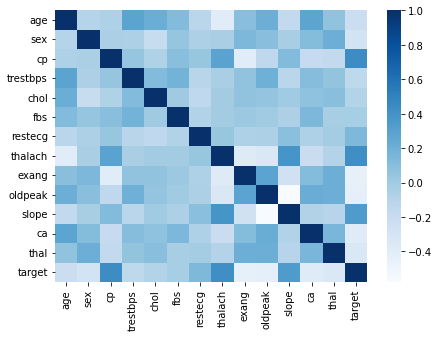

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize= (7 , 5))
sns.heatmap(df.corr(),cmap="Blues")

<AxesSubplot:xlabel='target', ylabel='count'>

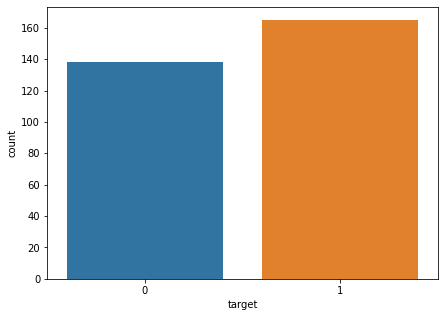

In [28]:
plt.figure(figsize= (7 , 5))
sns.countplot(data=df,x='target')

<AxesSubplot:>

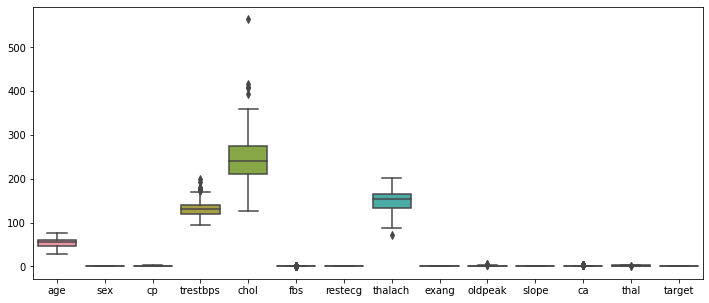

In [29]:
plt.figure(figsize= (12, 5))
sns.boxplot(data=df)

In [32]:
scalar=MinMaxScaler()
df_norm=scalar.fit_transform(df)
df_norm=pd.DataFrame(df_norm,columns=df.columns)
df_norm.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.708333,1.0,1.000000,0.481132,0.244292,1.0,0.0,0.603053,0.0,0.370968,0.0,0.0,0.333333,1.0
1,0.166667,1.0,0.666667,0.339623,0.283105,0.0,0.5,0.885496,0.0,0.564516,0.0,0.0,0.666667,1.0
2,0.250000,0.0,0.333333,0.339623,0.178082,0.0,0.0,0.770992,0.0,0.225806,1.0,0.0,0.666667,1.0
3,0.562500,1.0,0.333333,0.245283,0.251142,0.0,0.5,0.816794,0.0,0.129032,1.0,0.0,0.666667,1.0
4,0.583333,0.0,0.000000,0.245283,0.520548,0.0,0.5,0.702290,1.0,0.096774,1.0,0.0,0.666667,1.0


In [33]:
df.restecg.unique()

array([0, 1, 2], dtype=int64)

In [34]:
df.corr()['target']

age        -0.225439
sex        -0.280937
cp          0.433798
trestbps   -0.144931
chol       -0.085239
fbs        -0.028046
restecg     0.137230
thalach     0.421741
exang      -0.436757
oldpeak    -0.430696
slope       0.345877
ca         -0.391724
thal       -0.344029
target      1.000000
Name: target, dtype: float64

In [36]:
X=df_norm.drop('target',axis=1)
y=df_norm.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [79]:
svm=SVC()
hp = {'C': [0.1, 1, 10, 100, 1000],'gamma': [1, 0.1, 0.01, 0.001, 0.0001],'kernel': ['rbf']} 
SVM=GridSearchCV(svm,hp,cv=10)
SVM.fit(X_train,y_train)
y_pred1 = SVM.predict(X_test)
a1=accuracy_score(y_test, y_pred1)
accuracy_score(y_test, y_pred)

0.8852459016393442

In [80]:
LR=LogisticRegression()
LR.fit(X_train,y_train)
y_pred = LR.predict(X_test)
a2=accuracy_score(y_test, y_pred)
accuracy_score(y_test, y_pred)

0.8688524590163934

In [81]:
knn = KNeighborsClassifier()
hp1 = {'weights':['uniform','distance'],'n_neighbors':[2,3,4,5,6,7,8,9,10,11,12], 'p':[1,2]}
KNN = GridSearchCV(knn, hp1, cv=10)
KNN.fit(X_train, y_train)
y_pred3 = KNN.predict(X_test)
a3=accuracy_score(y_test, y_pred3)
accuracy_score(y_test, y_pred3)

0.8852459016393442

In [82]:
dt= DecisionTreeClassifier()
hp2 = {'criterion' : ['gini', 'entropy'],'min_samples_split' : [2,4,6,8],'min_samples_leaf': [1,2,3,4,5]}
DT= GridSearchCV(dt,hp2,cv=10)
DT.fit(X_train, y_train)
y_pred2 = DT.predict(X_test)
a4=accuracy_score(y_test, y_pred2)
accuracy_score(y_test, y_pred2)

0.7868852459016393

In [83]:
DF=pd.DataFrame({'Models':['SVM', 'Logistic Regression', 'KNN', 'Decision Tree'], "Accuracy":[a1*100,a2*100,a3*100,a4*100]})
DF

,Models,Accuracy
0,SVM,88.524590
1,Logistic Regression,86.885246
2,KNN,88.524590
3,Decision Tree,78.688525


In [88]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
a5=accuracy_score(y_test, y_pred)
accuracy_score(y_test, y_pred)

0.8852459016393442

In [108]:
from sklearn.ensemble import RandomForestClassifier
clf1 = RandomForestClassifier()
clf1.fit(X_train, y_train)
y_pred1 = clf1.predict(X_test)
a6=accuracy_score(y_test, y_pred1)
accuracy_score(y_test, y_pred1)

0.9016393442622951

In [107]:
from sklearn.ensemble import AdaBoostClassifier
AB= AdaBoostClassifier()
AB.fit(X_train,y_train)
y_pred = AB.predict(X_test)
a7 = accuracy_score(y_test,y_pred)
accuracy_score(y_test,y_pred)

0.8852459016393442

In [98]:
DF1=pd.DataFrame({'Models':['Gradient Boost', 'Random Forest', 'AdaBoost'], "Accuracy":[a5*100,a6*100,a7*100]})
DF1

,Models,Accuracy
0,Gradient Boost,88.524590
1,Random Forest,90.163934
2,AdaBoost,88.524590


In [100]:
import pickle 
#Save the model
file=open('model.pk','wb')
pickle.dump(clf1,file)

#load the model
loaded_model=pickle.load(open('model.pk','rb'))
result=loaded_model.score(X_test,y_test)
print(result)

0.9016393442622951


<AxesSubplot:>

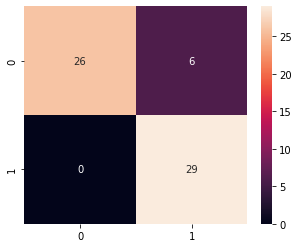

In [109]:
cm=confusion_matrix(y_test, y_pred1)
plt.figure(figsize=(5,4))
sns.heatmap(cm,annot=True)